In [17]:
import squidpy as sq
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scanpy as sc
import numpy as np
import pandas as pd
import anndata as ad
from scipy import sparse
import omicverse as ov

In [18]:
# 颗粒细胞来自step6的cluster的重命名
granulosa_combined = sc.read_h5ad("./pyobjs/granulosa_individual_combined_newscaling.h5ad")
granulosa_combined.obs_names

Index(['s_008um_00301_00321-1-CTR', 's_008um_00593_00642-1-CTR',
       's_008um_00336_00497-1-CTR', 's_008um_00605_00343-1-CTR',
       's_008um_00284_00196-1-CTR', 's_008um_00521_00423-1-CTR',
       's_008um_00652_00672-1-CTR', 's_008um_00320_00191-1-CTR',
       's_008um_00516_00369-1-CTR', 's_008um_00563_00437-1-CTR',
       ...
       's_008um_00326_00145-1-AAV', 's_008um_00251_00307-1-AAV',
       's_008um_00243_00304-1-AAV', 's_008um_00357_00367-1-AAV',
       's_008um_00442_00717-1-AAV', 's_008um_00220_00652-1-AAV',
       's_008um_00226_00297-1-AAV', 's_008um_00548_00323-1-AAV',
       's_008um_00309_00193-1-AAV', 's_008um_00456_00755-1-AAV'],
      dtype='object', length=115734)

In [19]:
sc.settings.set_figure_params(dpi=80, facecolor='white', frameon=True, figsize=(4, 4))
# 创建一个空的字典来存储分开的数据
granulosa_dict = {}

# 根据样本中的 "CTR" 和 "AAV" 分别筛选数据
granulosa_dict['CTR'] = granulosa_combined[granulosa_combined.obs['Sample'] == 'CTR']
granulosa_dict['AAV'] = granulosa_combined[granulosa_combined.obs['Sample'] == 'AAV']

In [20]:
samples_dict = {"CTR": "CTR", "AAV": "AAV"}
granulosa_combined = granulosa_dict[list(samples_dict.keys())[0]].concatenate([granulosa_dict[x] for x in list(samples_dict.keys())[1:]], 
                                                                                batch_key= "Sample", 
                                                                                batch_categories=list(samples_dict.keys()))
del granulosa_dict
granulosa_combined.obs_names


Index(['s_008um_00301_00321-1-CTR-CTR', 's_008um_00593_00642-1-CTR-CTR',
       's_008um_00336_00497-1-CTR-CTR', 's_008um_00605_00343-1-CTR-CTR',
       's_008um_00284_00196-1-CTR-CTR', 's_008um_00521_00423-1-CTR-CTR',
       's_008um_00652_00672-1-CTR-CTR', 's_008um_00320_00191-1-CTR-CTR',
       's_008um_00516_00369-1-CTR-CTR', 's_008um_00563_00437-1-CTR-CTR',
       ...
       's_008um_00326_00145-1-AAV-AAV', 's_008um_00251_00307-1-AAV-AAV',
       's_008um_00243_00304-1-AAV-AAV', 's_008um_00357_00367-1-AAV-AAV',
       's_008um_00442_00717-1-AAV-AAV', 's_008um_00220_00652-1-AAV-AAV',
       's_008um_00226_00297-1-AAV-AAV', 's_008um_00548_00323-1-AAV-AAV',
       's_008um_00309_00193-1-AAV-AAV', 's_008um_00456_00755-1-AAV-AAV'],
      dtype='object', length=115734)

In [21]:
adata_ovary_combined = sc.read_h5ad("pyobjs/slideseq_cell2loc_level1.h5ad")
adata_ovary_combined.obs_names

Index(['s_008um_00301_00321-1-CTR', 's_008um_00593_00642-1-CTR',
       's_008um_00630_00352-1-CTR', 's_008um_00598_00455-1-CTR',
       's_008um_00336_00497-1-CTR', 's_008um_00275_00289-1-CTR',
       's_008um_00265_00607-1-CTR', 's_008um_00605_00343-1-CTR',
       's_008um_00284_00196-1-CTR', 's_008um_00521_00423-1-CTR',
       ...
       's_008um_00238_00438-1-AAV', 's_008um_00631_00323-1-AAV',
       's_008um_00197_00639-1-AAV', 's_008um_00536_00521-1-AAV',
       's_008um_00548_00323-1-AAV', 's_008um_00252_00421-1-AAV',
       's_008um_00565_00244-1-AAV', 's_008um_00309_00193-1-AAV',
       's_008um_00373_00222-1-AAV', 's_008um_00456_00755-1-AAV'],
      dtype='object', length=303411)

In [22]:
import pandas as pd

# 重新分类函数
def categorize(celltype):
    if celltype.startswith('I_'):
        return 'Immune'
    elif celltype.startswith('GC_CL_'):
        return 'GC_Lytic'
    elif celltype.startswith('EN_'):
        return 'Endothelium'
    # elif celltype == 'GC_Estrous':
    #     return 'remove'
    elif celltype == 'M_Steroidogenic Theca':
        return 'M_Steroidogenic_stromal'
    elif celltype == "M_Smooth Muscle":
        return 'M_Smooth_Muscle'
    elif celltype == "M_Medullary Stroma":
        return 'M_Fibroblast-like_cells'
    elif celltype == 'M_Pericyte':
        return 'M_Pericyte'
    elif celltype == 'M_Cortical Stroma':
        return 'M_Fibroblast-like_cells'
    elif celltype == 'M_Dividing Mesenchyme':
        return 'M_Dividing_Mesenchyme'
    elif celltype == 'M_Immature Theca':
        return 'M_Dividing_Mesenchyme'
    else:
        return celltype

# 应用分类函数
adata_ovary_combined.obs['annotation'] = adata_ovary_combined.obs['Level1_max_pred_celltype'].apply(categorize)

In [23]:
print(adata_ovary_combined.obs["annotation"].value_counts())

annotation
M_Steroidogenic_stromal    55770
GC_Lytic                   52982
Endothelium                42732
GC_Antral                  30180
M_Smooth_Muscle            23452
Immune                     19972
GC_Mitotic                 17406
M_Fibroblast-like_cells    16788
Epithelium                  9721
M_Pericyte                  8877
M_Dividing_Mesenchyme       7436
GC_Preantral                6125
GC_Atretic                  5530
GC_Estrous                  3511
Oocyte                      2918
GC_Mural                      11
Name: count, dtype: int64


In [25]:
# 新的cell types
new_celltypes = granulosa_combined.obs["granulosa_celltypes"]
adata_ovary_combined.obs["annotation"] = adata_ovary_combined.obs["annotation"].astype("category")

# 确保类别一致性
new_categories = new_celltypes.cat.categories.union(adata_ovary_combined.obs["annotation"].cat.categories)
new_celltypes = new_celltypes.cat.set_categories(new_categories)
adata_ovary_combined.obs["annotation"] = adata_ovary_combined.obs["annotation"].cat.set_categories(new_categories)

# 更新obs中的值
adata_ovary_combined.obs.loc[new_celltypes.index, "annotation"] = new_celltypes


In [9]:
adata_ovary_combined.obs["annotation"] = adata_ovary_combined.obs["annotation"].astype("str")
adata_ovary_combined.obs["annotation"] = adata_ovary_combined.obs["annotation"].astype("category")
print(adata_ovary_combined.obs["annotation"].value_counts())

annotation
M_Steroidogenic_stromal    55770
GC_Lytic                   44313
Endothelium                42732
GC_Antral                  39480
M_Smooth_Muscle            23452
Immune                     19972
GC_Preantral               17362
M_Fibroblast-like_cells    16788
GC_Atretic                 12044
Epithelium                  9721
M_Pericyte                  8877
M_Dividing_Mesenchyme       7436
Oocyte                      2918
Others                      2535
GC_Mural                      11
Name: count, dtype: int64


In [10]:
adata_ovary_combined.write_h5ad("Integrate/celltype_annotation.h5ad")

In [64]:
# 移除分类为 'remove' 的行
adata_ovary_combined = adata_ovary_combined[adata_ovary_combined.obs['annotation'] != 'GC_Mural']
adata_ovary_combined = adata_ovary_combined[adata_ovary_combined.obs['annotation'] != 'Others']

In [65]:
colors = ['#e31a1c', # Endothelium
            '#DFA0A6', # Epithelium
            '#CB6B7A', # antral
            '#cb8e85', # atretic
            # '#fb9a99', # Lytic
            '#f15536',
            # '#fdbf6f',
            # '#ff7f00',
            '#EDBAA7',
            '#FFA500', # immune
            '#C0C0C0',# M
            
            '#8A2BE2',
            '#A0C2e7', 
            # '#98b3d9',
            
            # '#6495ED',
            
            '#F8F8FF',
            '#D5CBDA',
            '#ae716e'] # oocyte
# 添加颜色信息到adata.uns中
adata_ovary_combined.uns['annotation_colors'] = colors

[<AxesSubplot: title={'center': 'ctr'}, xlabel='spatial1', ylabel='spatial2'>]

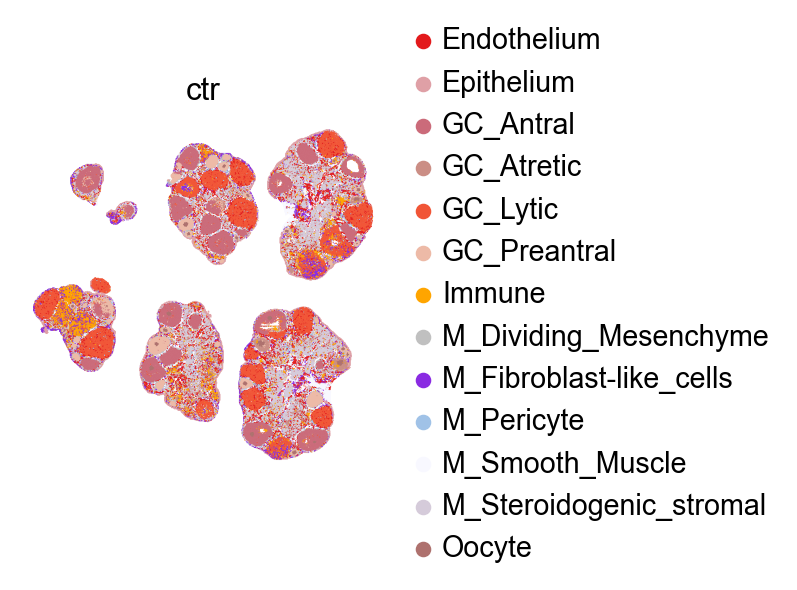

In [66]:
# 创建一个仅用于保存图例的图形
fig, ax = plt.subplots(figsize=(3, 6))  # 这里定义图例保存图形尺寸


subset = adata_ovary_combined[adata_ovary_combined.obs["Sample"] == 'CTR']

sc.pl.spatial(subset, color=['annotation'], 
                wspace=0.0, hspace=0.0, spot_size=30, 
                frameon=False, title="ctr", show=False, ax=ax)


In [67]:
print(adata_ovary_combined.obs["annotation"].value_counts())

annotation
M_Steroidogenic_stromal    55770
GC_Lytic                   44313
Endothelium                42732
GC_Antral                  39480
M_Smooth_Muscle            23452
Immune                     19972
GC_Preantral               17362
M_Fibroblast-like_cells    16788
GC_Atretic                 12044
Epithelium                  9721
M_Pericyte                  8877
M_Dividing_Mesenchyme       7436
Oocyte                      2918
Name: count, dtype: int64


In [72]:
adata_ovary_combined.write_h5ad("./Integrate/adata_ovary_combined_annotation_total_new.h5ad")

In [69]:
import scanpy as sc
import matplotlib.pyplot as plt

# 设置图形参数
sc.settings.set_figure_params(dpi=100, 
                              dpi_save=100, 
                              fontsize=10, 
                              facecolor='white', 
                              frameon=False, figsize=(12, 6),
                              vector_friendly=False, transparent=True, format="pdf")

grouping_var = "annotation"
samples = list(samples_dict.keys())
fig, axs = plt.subplots(1, len(samples), figsize=(len(samples) * 4, 8))

handles, labels = None, None  # 初始化图例变量

for i, sample in enumerate(samples):
    subset = adata_ovary_combined[adata_ovary_combined.obs["Sample"] == sample]
    ax = axs[i]
    sc.pl.spatial(subset, color=[grouping_var], 
                  wspace=0.0, hspace=0.0, spot_size=30, 
                  frameon=False, title=sample, show=False, ax=ax, legend_loc=None)
    if handles is None and labels is None:  # 保存第一个子图的图例信息
        handles, labels = ax.get_legend_handles_labels()

# 仅在 handles 和 labels 不为 None 时添加全局图例
if handles and labels:
    # 使用子图外部的图例
    fig.legend(handles, labels, loc='center left', bbox_to_anchor=(1.02, 0.5), frameon=False)

plt.subplots_adjust(wspace=0, hspace=0)

# 保存图像为 PDF 文件
plt.savefig("figures/spatial_plot_level1_total_new.pdf", format='pdf', bbox_inches='tight')

# 关闭图形以节省内存
plt.close()


In [71]:
import matplotlib.pyplot as plt

# # 假设 handles 和 labels 从之前的图例中获取
# # 示例 handles 和 labels
# handles = [plt.Line2D([0], [0], color='red', lw=4, label='Label 1'),
#            plt.Line2D([0], [0], color='blue', lw=4, label='Label 2')]
# labels = ['Red Label', 'Blue Label']

# 创建一个仅用于保存图例的图形
fig, ax = plt.subplots(figsize=(2, 6))  # 这里定义图例保存图形尺寸


subset = adata_ovary_combined[adata_ovary_combined.obs["Sample"] == 'CTR']

sc.pl.spatial(subset, color=[grouping_var], 
                wspace=0.0, hspace=0.0, spot_size=30, 
                frameon=False, title=sample, show=False, ax=ax, cmap="RdPu")




# 保存图像为 PDF 文件
plt.savefig("figures/spatial_plot_level1_legend_new.pdf", format='pdf', bbox_inches='tight')

# 关闭图形以节省内存
plt.close()

